# Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

## **Step 1: Import and analyse the data set.**

In [ ]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
#num_words=10,000 since Words are ranked by how often they occur (in the training set) 
#and only the num_words ie 10k most frequent words are kept

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
training_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
training_targets

array([1, 0, 0, ..., 0, 1, 0])

### **Analyzing the Dataset**

In [ ]:
#Concatenating the training and testing data to perform various analysis
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [ ]:
print("Categories:", np.unique(targets))


Categories: [0 1]


In [ ]:
#numpy.hstack() is used to stack the sequence of input arrays horizontally to make a single array.
print("Number of unique words:", len(np.unique(np.hstack(training_data,testing_data))))

Number of unique words: 9998


In [ ]:
length = [len(i) for i in data]
length[:10]

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

In [ ]:
max(length)

2494

In [ ]:
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


So we see that dataset is labeled into two categories, — 0 or 1, which represents the sentiment of the review. 
The whole dataset contains 9,998 unique words and the average review length is 234 words, with a standard deviation of 173 words.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


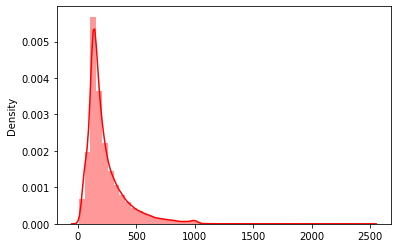

In [ ]:
sns.distplot(length,color='red',label=' Total Review Length');

## **POSTIVE AND NEGATIVE REVIEW COMPARISION**

In [ ]:
pos_rev=[]
neg_rev=[]

In [ ]:
for i in np.arange(len(data)):
  if targets[i]==0:
    neg_rev.append(len(data[i]))
  else:
    pos_rev.append(len(data[i]))  

In [ ]:
len(pos_rev),len(neg_rev)

(25000, 25000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Freq of Occurence'), Text(0.5, 0, 'Total Word Count')]

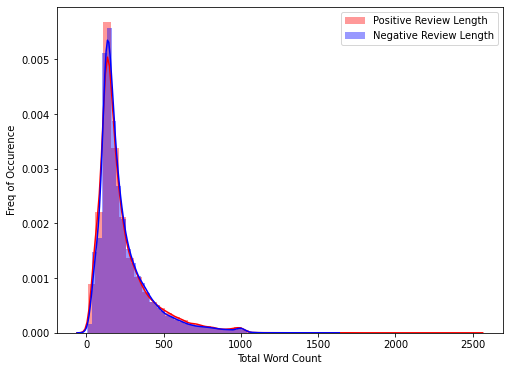

In [ ]:
fig,ax=plt.subplots(figsize=(8,6));
sns.distplot(pos_rev,color='red',label='Positive Review Length');
sns.distplot(neg_rev,color='blue',label='Negative Review Length');
ax.legend()
ax.set(xlabel='Total Word Count',ylabel='Freq of Occurence')

We see that the histogram for both positive and negative reviews is nearly the same.

## **Step 2:Perform relevant sequence adding on the data**

In [ ]:
#Use the first 20 words from each review to speed up training

from keras.preprocessing import sequence
max_review_length = 20

training_data1 = sequence.pad_sequences(training_data, maxlen=max_review_length,padding='post')
testing_data1 = sequence.pad_sequences(testing_data, maxlen=max_review_length,padding='post')

## **Step 3: Perform following data analysis**


## **Step 3.1: Print shape of features and labels**

In [ ]:
len(training_data),len(training_targets)

(25000, 25000)

In [ ]:
len(testing_data),len(testing_targets)


(25000, 25000)

In [ ]:
length = [len(i) for i in data1]

In [ ]:
np.unique(length)

array([20])

In [ ]:
print("Shape of Training Features is",training_data1.shape)
print("Shape of Training Labels is",training_targets.shape,"\n")

print("Shape of Testing Features is",testing_data1.shape)
print("Shape of Testing Labels is",testing_targets.shape)

Shape of Training Features is (25000, 20)
Shape of Training Labels is (25000,) 

Shape of Testing Features is (25000, 20)
Shape of Testing Labels is (25000,)



## **Step 3.2: Print value of any one feature and it's label**


In [ ]:
print("Label:", training_targets[5])

Label: 0


In [ ]:
print(training_data1[5])

[  10   10 1361  173    4  749    2   16 3804    8    4  226   65   12
   43  127   24    2   10   10]


## **Step 4: Decode the feature value to get original sentence**

In [ ]:
index = imdb.get_word_index()
#index

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
#reverse_index

In [ ]:
key_list=[key for key in sorted(reverse_index)] 
len(key_list),key_list[:10]   

(88584, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
decoded=" ".join( [reverse_index.get(i) for i in training_data1[5]] )
decoded

'the effort still been that usually makes for of finished sucking ended and an because before if just though something'

In [ ]:
print("Label:", training_targets[150])
print("Review:",training_data1[150])
print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in training_data1[150]] ))

Label: 1
Review: [  43   92 1278  501   15    8 6353    2   15 1609  131   47   24   77
    2  237    2    2  158  158]
Actual Sentence is :  out then rare days for in disabled and for angry these there his will and he's and and didn't didn't


In [ ]:
print("Label:", training_targets[500])
print("Review:",training_data1[500])
print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in training_data1[500]] ))

Label: 0
Review: [ 21  15 191 607   4 910 552   7 229   5 226  20 198 138  10  10 241  46
   7 158]
Actual Sentence is :  not for big looked of badly roles br guy to script on series such i i am some br didn't


## **Step 5: Design, train, tune and test a sequential model.**

In [ ]:
x_train = sequence.pad_sequences(training_data, maxlen=20)
x_test = sequence.pad_sequences(testing_data, maxlen=20)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 20)
x_test shape: (25000, 20)


In [ ]:
y_train=training_targets
y_test=testing_targets

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding,LSTM


In [ ]:
max_features=20000

In [ ]:
model = keras.Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
results=model.fit(x_train, y_train,
          epochs=15,
          validation_data=(x_test, y_test))

Epoch 1/15
782/782 [==============================] - 89s 113ms/step - loss: 0.0538 - accuracy: 0.9813 - val_loss: 1.2834 - val_accuracy: 0.7333
Epoch 2/15
782/782 [==============================] - 89s 113ms/step - loss: 0.0385 - accuracy: 0.9865 - val_loss: 1.5479 - val_accuracy: 0.7321
Epoch 3/15
782/782 [==============================] - 88s 113ms/step - loss: 0.0301 - accuracy: 0.9893 - val_loss: 1.5071 - val_accuracy: 0.7307
Epoch 4/15
782/782 [==============================] - 88s 112ms/step - loss: 0.0277 - accuracy: 0.9907 - val_loss: 1.6254 - val_accuracy: 0.7330
Epoch 5/15
782/782 [==============================] - 88s 113ms/step - loss: 0.0211 - accuracy: 0.9928 - val_loss: 1.6693 - val_accuracy: 0.7314
Epoch 6/15
782/782 [==============================] - 88s 112ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 1.8581 - val_accuracy: 0.7298
Epoch 7/15
782/782 [==============================] - 88s 112ms/step - loss: 0.0167 - accuracy: 0.9950 - val_loss: 1.8152 - val_ac

We have tried tuning the model with different optimizers (SGD, adam, rmsprop), changing dropout ratios and no. of neurons in NN. However, the above given model gives the best training and validation accuracies. 

In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print('Train Loss:', score)
print('Train accuracy:', acc)

782/782 [==============================] - 5s 6ms/step - loss: 0.0021 - accuracy: 0.9994
Train Loss: 0.0020760823972523212
Train accuracy: 0.9994400143623352


In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test accuracy:', acc)

782/782 [==============================] - 5s 6ms/step - loss: 2.0214 - accuracy: 0.7302
Test Loss: 2.021416187286377
Test accuracy: 0.730239987373352


Predicting Test data with Neural Network Model

In [ ]:
preds=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
preds

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
pred_classes=preds.reshape(len(x_test))
pred_classes

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

## **Model Effect Overview**

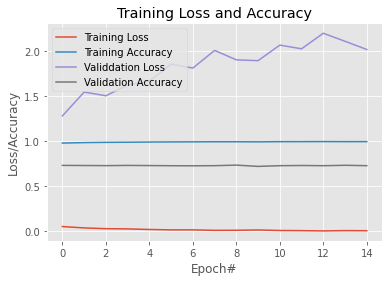

In [ ]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0,15),results.history['loss'],label='Training Loss')
plt.plot(np.arange(0,15),results.history['accuracy'],label='Training Accuracy')
plt.plot(np.arange(0,15),results.history['val_loss'],label='Validdation Loss')
plt.plot(np.arange(0,15),results.history['val_accuracy'],label='Validation Accuracy')

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch#")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
print(np.mean(results.history["val_accuracy"]))

0.7309893329938253


## **Confusion Matrix and Correlation Report**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd

In [ ]:
cm=confusion_matrix(y_test,preds)
df_cm=pd.DataFrame(cm,index=['Bad','Good'],columns=['Bad','Good'])
df_cm.head()

,Bad,Good
Bad,9202,3298
Good,3446,9054


In [ ]:
report=classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73     12500
           1       0.73      0.72      0.73     12500

    accuracy                           0.73     25000
   macro avg       0.73      0.73      0.73     25000
weighted avg       0.73      0.73      0.73     25000



## **Step 6: Use the designed model to print the prediction on any one sample**

In [ ]:
SentimentDict={1:'positive', 0:'negative'}

In [ ]:
preds=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
preds

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
len(preds)

25000

In [ ]:
pred_classes=preds.reshape(len(x_test))
pred_classes

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
print("Review:",x_test[500],"\n")

print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in x_test[500]] ),'\n')

print('Actual Label: ', SentimentDict[y_test[500]], ', Model Prediction: ', SentimentDict[pred_classes[500]])

Review: [ 46 304  33   4 130  81  24 563  33   4 380   7   4 898  10  10  33 222
   6 693] 

Actual Sentence is :  some beautiful they of here people his cannot they of sex br of write i i they there's is supporting 

Actual Label:  positive , Model Prediction:  positive


In [ ]:
print("Review:",x_test[600],"\n")

print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in x_test[600]] ),'\n')

print('Actual Label: ', SentimentDict[y_test[600]], ', Model Prediction: ', SentimentDict[pred_classes[600]])

Review: [   6  601  437    7   58    5  209    6  824   31    7    4  249    8
 2123    4  403    7 9142 6497] 

Actual Sentence is :  is group hope br my to comedy is tom by br of sure in creates of human br guided evelyn 

Actual Label:  negative , Model Prediction:  negative


In [ ]:
print("Review:",x_test[6000],"\n")

print("Actual Sentence is : "," ".join( [reverse_index.get(i) for i in x_test[6000]] ),'\n')

print('Actual Label: ', SentimentDict[y_test[6000]], ', Model Prediction: ', SentimentDict[pred_classes[6000]])

Review: [ 113   33    2 6772   14    9    6   87  356   22    5   80   30 2395
   34  111 5122    8  216  358] 

Actual Sentence is :  acting they and mystical as it is him need you to into at influence who plot 1995 in saw use 

Actual Label:  positive , Model Prediction:  positive
